In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 563.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
# Importing Libraries.
import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import torch

In [ ]:
import kagglehub

# Download the Latest Version.
data_path = kagglehub.dataset_download("fanconic/skin-cancer-malignant-vs-benign")

print("Path to dataset files:", data_path)

Path to dataset files: /kaggle/input/skin-cancer-malignant-vs-benign


In [ ]:
# Check the Initial Downloaded Path.
print("Initial downloaded path:", data_path)

# Verify Dataset Folder Structure.
data_dir = os.path.join(data_path, 'skin-cancer-malignant-vs-benign')

if os.path.exists(data_dir):
    print(f"Dataset directory exists: {data_dir}")
    print("Subdirectories:", os.listdir(data_dir))
else:
    print(f"Dataset directory does not exist: {data_dir}")
    print("Contents of the main data path:", os.listdir(data_path))

Initial downloaded path: /kaggle/input/skin-cancer-malignant-vs-benign
Dataset directory does not exist: /kaggle/input/skin-cancer-malignant-vs-benign/skin-cancer-malignant-vs-benign
Contents of the main data path: ['data', 'test', 'train']


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

def load_images_and_labels(directory):
    """Loads images and labels from a directory into a Pandas DataFrame."""

    image_data = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                if filename.endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path)
                    img = img.resize((224, 224))
                    img_array = img_to_array(img)
                    image_data.append({'image': img_array, 'diagnosis': class_name})

    return pd.DataFrame(image_data)

train_path = os.path.join(data_path, 'train')

# Load the Data & Labels into a DataFrame.
data = load_images_and_labels(train_path) # This line Creates & Assigns the 'data' DataFrame.

# Normalize Pixel Xalues.
data['image'] = data['image'] / 255.0

# Display 'data' DataFrame.
data

,image,diagnosis
0,"[[[0.9254902, 0.6392157, 0.6745098], [0.929411...",benign
1,"[[[0.81960785, 0.6313726, 0.62352943], [0.8156...",benign
2,"[[[0.9372549, 0.5921569, 0.5882353], [0.925490...",benign
3,"[[[0.039215688, 0.003921569, 0.015686275], [0....",benign
4,"[[[0.78431374, 0.4117647, 0.42745098], [0.7803...",benign
...,...,...
2632,"[[[0.79607844, 0.6627451, 0.5254902], [0.81176...",malignant
2633,"[[[0.7647059, 0.6039216, 0.627451], [0.7803921...",malignant
2634,"[[[0.43137255, 0.34117648, 0.27058825], [0.466...",malignant
2635,"[[[0.6431373, 0.47843137, 0.49411765], [0.6470...",malignant


In [ ]:
# Description of Data.
data.describe()

,image,diagnosis
count,2637,2637
unique,2637,2
top,"[[[0.4509804, 0.3647059, 0.37254903], [0.45490...",benign
freq,1,1440


In [ ]:
# data_path containing the Main Folder where the Dataset was Downloaded.
data_dir = os.path.join(data_path, 'train')

# Verifying the Directory & List its Contents.
if os.path.exists(data_dir):
    print(f"Dataset directory found: {data_dir}")
    print("Subdirectories in the dataset:", os.listdir(data_dir))
else:
    raise FileNotFoundError(f"Dataset directory not found: {data_dir}")

# Image Data Generator.
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Dataset directory found: /kaggle/input/skin-cancer-malignant-vs-benign/train
Subdirectories in the dataset: ['benign', 'malignant']
Found 2110 images belonging to 2 classes.


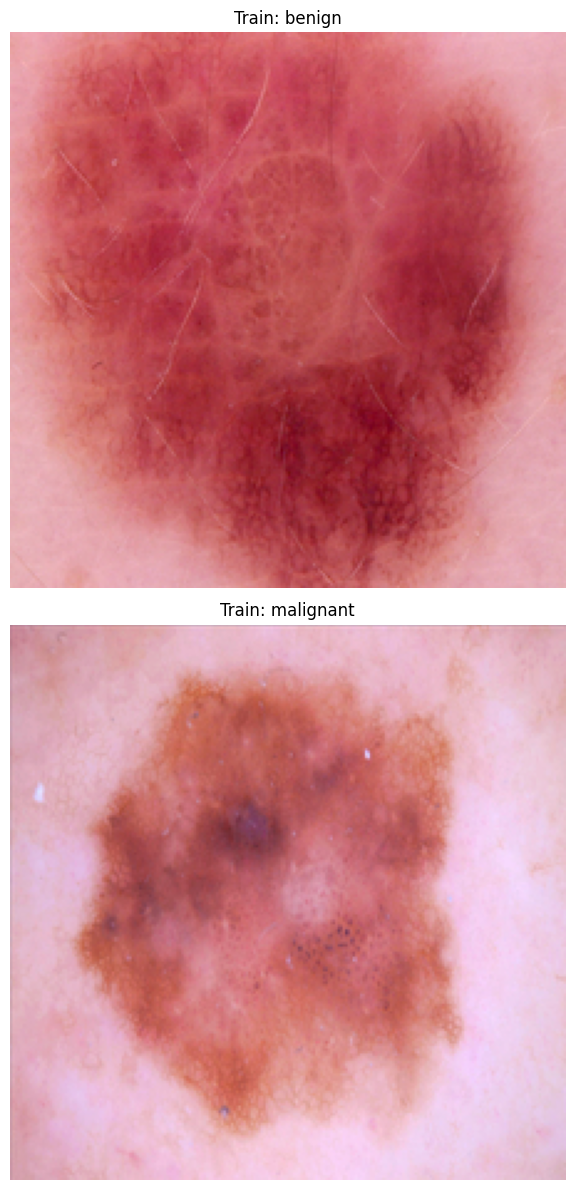

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

# Function to Plot Images from a Directory.
def plot_images_from_directory(directory, title):
    class_names = os.listdir(directory)
    num_classes = len(class_names) # Get the Number of Classes from class_names.

    plt.figure(figsize=(12, 12))
    for i, class_name in enumerate(class_names): # Iterate through class_names.
        class_dir = os.path.join(directory, class_name) # Use class_name for the Path.
        image_path = os.path.join(class_dir, os.listdir(class_dir)[0])
        img = load_img(image_path, target_size=(224, 224))
        plt.subplot(1, num_classes, i + 1) # Update Subplot Layout.
        plt.imshow(img)
        plt.title(f'Train: {class_name}') # Display the Class Name.
        plt.axis('off')

    plt.suptitle(title)
    plt.show()


def display_images(directory, num_images_per_class=1):
    """Displays images from a given directory.

    Args:
        directory: The path to the directory containing the images.
        num_images_per_class: The number of images to display per class.
    """

    class_names = os.listdir(directory)
    num_classes = len(class_names) # Update num_classes.

    plt.figure(figsize=(12, 12))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        image_paths = os.listdir(class_dir)[:num_images_per_class]

        for j, image_path in enumerate(image_paths):
            image_path = os.path.join(class_dir, image_path)
            try:
                img = Image.open(image_path).resize((224, 224))
                plt.subplot(num_classes, num_images_per_class, i * num_images_per_class + j + 1)
                plt.imshow(img)
                plt.title(f'Train: {class_name}')
                plt.axis('off')
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

    plt.tight_layout()
    plt.show()

# Assuming data_path is defined correctly.
dataset_path = os.path.join(data_path, 'train') # Remove the extra 'skin-cancer-malignant-vs-benign'.

# Call the display_images.
display_images(dataset_path)

diagnosis
benign       1440
malignant    1197
Name: count, dtype: int64


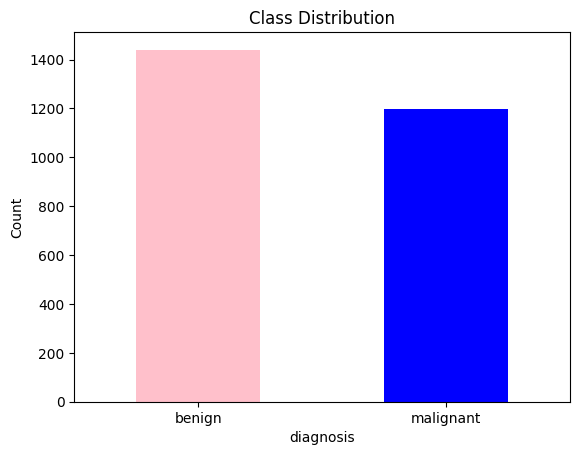

In [ ]:
def load_images_and_labels(directory):
    """Loads images and labels from a directory into a Pandas DataFrame."""

    image_data = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                if filename.endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path)
                    img = img.resize((224, 224))
                    img_array = img_to_array(img)
                    image_data.append({'image': img_array, 'diagnosis': class_name})

    return pd.DataFrame(image_data)

# Assuming data_path is defined correctly.
train_path = os.path.join(data_path, 'train')

# Load the Data & Labels into a DataFrame.
data = load_images_and_labels(train_path)

# Normalize Pixel Values.
data['image'] = data['image'] / 255.0

# Class Distribution.
print(data['diagnosis'].value_counts())
data['diagnosis'].value_counts().plot(kind='bar', color=['pink', 'blue'])
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
def read_images(directory):
    """Reads images from a directory and returns them as a NumPy array.

    Args:
        directory: The path to the directory containing the images.

    Returns:
        A NumPy array containing the images.
    """

    images = []
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            img = img.resize((224, 224))
            img_array = img_to_array(img)
            images.append(img_array)

    return np.array(images)

# Define train_dir with the Correct Path.
train_dir = os.path.join(data_path, 'train')
benign_path = os.path.join(train_dir, 'benign')
malignant_path = os.path.join(train_dir, 'malignant')

# Read Images & Create Labels.
benign_images = read_images(benign_path)
malignant_images = read_images(malignant_path)

# Create Labels: 0 for Benign, 1 for Malignant.
benign_labels = np.zeros(benign_images.shape[0])
malignant_labels = np.ones(malignant_images.shape[0])

# Concatenate Data & Labels.
data = np.concatenate([benign_images, malignant_images])
labels = np.concatenate([benign_labels, malignant_labels])

# Normalize Pixel Values.
data = data / 255.0

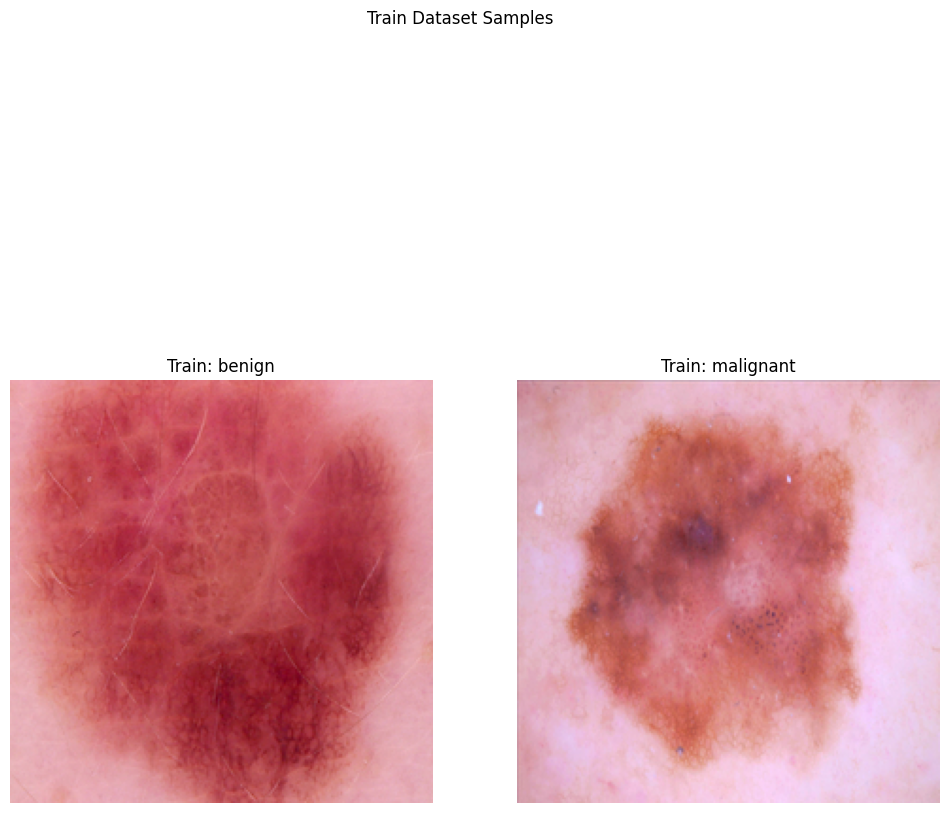

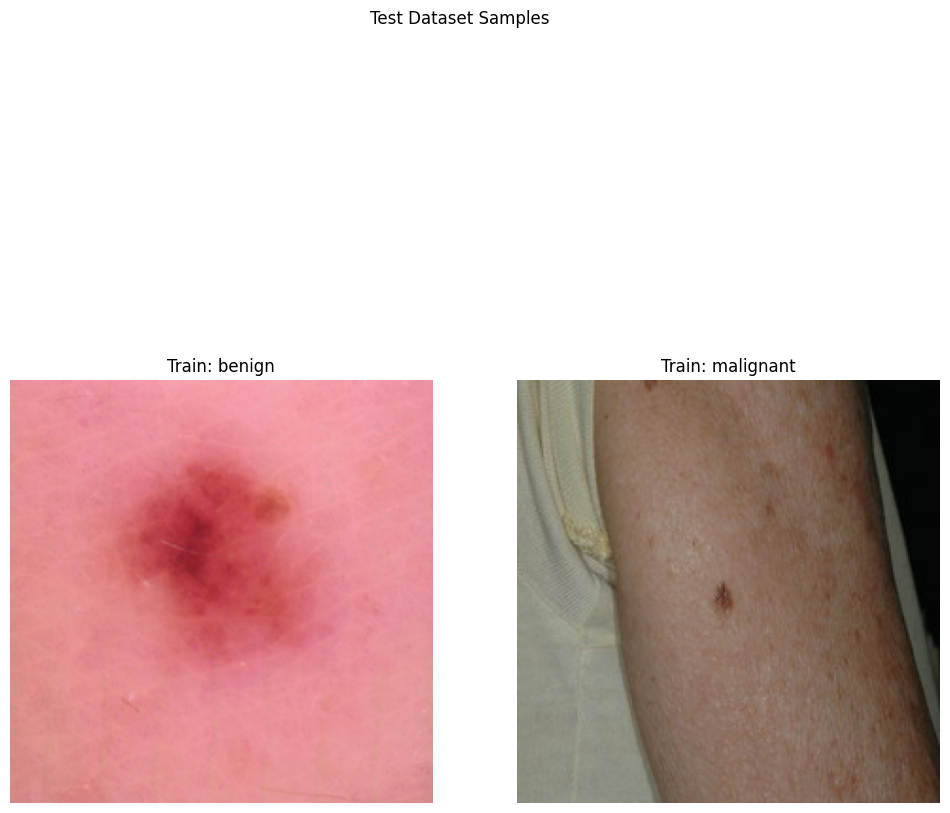

In [ ]:
# Visualize Train Dataset.
plot_images_from_directory(train_dir, 'Train Dataset Samples')

# Define test_dir.
test_dir = os.path.join(data_path, 'test')

# Visualize Test Dataset.
plot_images_from_directory(test_dir, 'Test Dataset Samples')

In [ ]:
def load_images_and_labels(directory):
    """Loads images and labels from a directory.

    Args:
        directory: The path to the directory containing the images.

    Returns:
        A tuple containing the images and labels.
    """

    images = []
    labels = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                if filename.endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path)
                    img = img.resize((224, 224))
                    img_array = img_to_array(img)
                    images.append(img_array)
                    labels.append(0 if class_name == 'benign' else 1)

    return np.array(images), np.array(labels)

# Assuming data_path is defined correctly.
train_path = os.path.join(data_path, 'train')
test_path = os.path.join(data_path, 'test')

# Load the Data & Labels.
X_train, y_train = load_images_and_labels(train_path)
X_test, y_test = load_images_and_labels(test_path)

# Normalize the Data.
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Training data: {X_train.shape}, Training labels: {y_train.shape}")
print(f"Testing data: {X_test.shape}, Testing labels: {y_test.shape}")

Training data: (2637, 224, 224, 3), Training labels: (2637,)
Testing data: (660, 224, 224, 3), Testing labels: (660,)


In [ ]:
# Checking the Size of the Dataset.
print(f"Total data size: {len(data)}, Total labels: {len(labels)}")

Total data size: 2637, Total labels: 2637


In [ ]:
# Splitting into Training & Testing.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"Training size: {len(X_train)}, Testing size: {len(X_test)}")

# Further Splitting Training Dataset into Train & Validation.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}")

Training size: 2109, Testing size: 528
Train size: 1687, Validation size: 422


In [ ]:
# Splitting Data into Training & Testing Sets (80% Train, 20% Test).
X = X_train
y = y_train

# Now perform the Train-Test Split with the defined X & y.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Build CNN Model.
model = Sequential([
    # First Convolutional Block.
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)), # Reduces Spatial Dimensions.

    # Second Convolutional Block.
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block.
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten & Fully Connected Layers.
    Flatten(),
    Dense(128, activation='relu'), # Dense Layer for Feature Extraction.
    Dropout(0.5), # Dropout to Reduce Overfitting.
    Dense(1, activation='sigmoid') # Binary Classification Output.
])

# Justification:
# - Three Convolutional Layers: Capture Complex Features Progressively.
# - MaxPooling Layers: Reduce Spatial Dimensions, making computations Efficient.
# - Fully Connected Layers: Learn High-Level Representations for Classification.

# Compile Model.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early Stopping.
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', # Metric to Monitor.
    patience=3, # Number of Epochs to wait for improvement.
    restore_best_weights=True # Restore Model Weights from the Best Epoch.
)

# Assuming 'batch_size' & 'epochs' are defined, replace with Actual Values.
batch_size = 32 # Replace with your desired Batch Size.
epochs = 10 # Replace with your desired Number of Epochs.

# Train the Model with Early Stopping.
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping], # Add Early Stopping here.
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.5561 - loss: 0.6964 - val_accuracy: 0.5473 - val_loss: 0.7048
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.5408 - loss: 0.6911 - val_accuracy: 0.5473 - val_loss: 0.6874
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.5741 - loss: 0.6849 - val_accuracy: 0.5473 - val_loss: 0.6864
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.5469 - loss: 0.6914 - val_accuracy: 0.5473 - val_loss: 0.6871
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.5712 - loss: 0.6883 - val_accuracy: 0.5473 - val_loss: 0.6875
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.5238 - loss: 0.6935 - val_accuracy: 0.5473 - val_loss: 0.6878


In [ ]:
# Training Parameters.
batch_size = 32
epochs = 15

# Data Augmentation.
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Train the Model.
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.5685 - loss: 0.6690 - val_accuracy: 0.7959 - val_loss: 0.4705
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.7435 - loss: 0.5246 - val_accuracy: 0.7840 - val_loss: 0.4663
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.7738 - loss: 0.4968 - val_accuracy: 0.7988 - val_loss: 0.4066
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.7844 - loss: 0.4595 - val_accuracy: 0.7988 - val_loss: 0.4575
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.7518 - loss: 0.4841 - val_accuracy: 0.8077 - val_loss: 0.4409
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.7904 - loss: 0.4425 - val_accuracy: 0.7899 - val_loss: 0.4372
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.7603 - loss: 0.5096 - val_accuracy: 0.7959 - val_loss: 0.4041
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.7946 - loss: 0.4096 - val_accuracy: 0.8047 - v

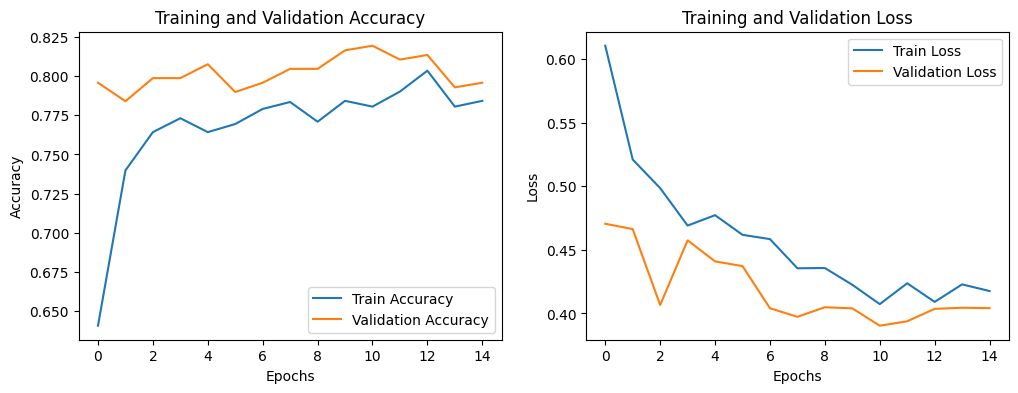

In [ ]:
# Visualize Training Performance.

def plot_performance(history):
  """Plots the training and validation accuracy and loss curves."""

  plt.figure(figsize=(12, 4))

  # Accuracy Plot.
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.legend()

  # Loss Plot.
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  plt.show()

plot_performance(history=history)

In [ ]:
# Evaluate the Model.
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.4041, Test Accuracy: 0.7959


In [ ]:
# Predictions.
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Define the Target Names (Class Labels).
categories = ['benign', 'malignant']

# Classification Report.
print(classification_report(y_test, y_pred, target_names=categories))

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 580ms/step
              precision    recall  f1-score   support

      benign       0.89      0.72      0.79       185
   malignant       0.72      0.89      0.80       153

    accuracy                           0.80       338
   macro avg       0.81      0.80      0.80       338
weighted avg       0.81      0.80      0.80       338



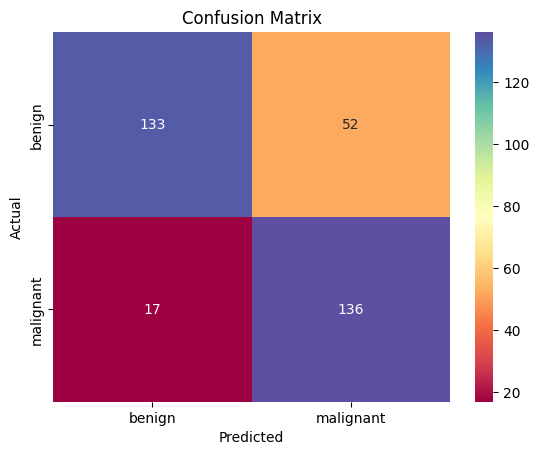

In [ ]:
# Confusion Matrix.

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Spectral', xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Create the Directory if it doesn't exist.
os.makedirs('/kaggle/working', exist_ok=True)

# Save the Model.
torch.save(model, '/kaggle/working/trained_model')